## Preamble

Run code in this section first. All other sections are independent from each other, and cells within each section have to be ran sequentially.

In [1]:
using DrWatson
@quickactivate "Data-driven resolvent"

include(srcdir("ChannelFlowUtils.jl"))
include(srcdir("PoiseuilleFlow.jl"))
include(srcdir("Example2_utils.jl"))
using Plots, Plots.PlotMeasures, LaTeXStrings
using LinearAlgebra,Statistics
using MAT

## Data-driven resolvent analysis

### Dataset 1: random disturbances

In [87]:
dir = datadir("sims","channel_flow","run_random_")
runs = collect(1:4)
t = collect(0.0:0.5:400)
X,Y = load_snapshots(dir,runs,t)
U,sigma,V = svd(X, full=false)
V = Array(V)
pod = @strdict U sigma V

Dict{String,Array{Float64,N} where N} with 3 entries:
  "sigma" => [4.13118e6, 8.49707, 4.42515, 2.4159, 1.40007, 1.4, 1.3029, 1.0887…
  "U"     => [6.81978e-16 -5.60166e-10 … -0.00150694 -4.02636e-5; -6.39639e-19 …
  "V"     => [0.0176777 0.000588506 … 0.0 0.0; 0.0176777 0.000175691 … 5.82503e…

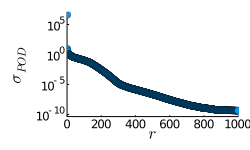

In [88]:
scatter(sigma,yscale=:log10,size=(250,150),xlim=(0,1000),grid=false,leg=false,ylabel=L"\sigma_{POD}",xlabel=L"r")

In [68]:
r = 140+90*(p-1)

230

In [76]:
(1400-140)/14

90.0

In [89]:
r = 410
@unpack U,sigma,V = pod
tol = 1e-16
lambda,V,W,b = DMD_from_POD(X,Y,dt,U,sigma,V,r,tol);

In [61]:
sigmas

15-element Array{Any,1}:
 [12616.748411859793, 11050.1158450792, 8179.485479306423, 315.18885712195646]
 [12616.209883563093, 11050.087800034658, 8177.151154769013, 310.86805370058147]
 [12616.8101643046, 11050.15459721898, 8175.416329067642, 308.99621937679274]
 [12615.380087838976, 11049.705494733864, 8174.545511983335, 303.739350248285]
 [12612.700435706818, 11049.172357316189, 8171.939736114892, 302.1743957088853]
 [12619.297146986182, 11048.536406745157, 8165.996265210344, 297.7829431501091]
 [12607.586041448745, 11045.27390200151, 8163.893368737704, 292.4343531024431]
 [12595.200216067791, 11047.010457949236, 8140.558048029277, 284.86772225295306]
 [12666.84696569604, 11025.131822498628, 8088.216568942085, 279.37137865325246]
 [12504.837745174276, 10992.300803549902, 8038.410610484169, 266.0274640463966]
 [12541.165868499953, 10900.052337016392, 7953.997657421671, 260.38463640027794]
 [12291.03488796761, 9635.429253891332, 6390.753800860003, 233.91879113682407]
 [9957.98388661134

In [90]:
~,σ,~ = opt_forcing(lambda[2:end],V[:,2:end],Q,0.0)
σ

409-element Array{Float64,1}:
 11695.291592770935
 10752.464687063246
  9373.585717009046
  8155.580233597924
  2880.0600816134447
  1558.7317166609348
   222.07314007601192
   209.6117903165256
   148.19219380144247
    75.95143890655487
    61.104939843819835
    36.81101826415874
    27.85337513912157
     ⋮
     0.18784962171075317
     0.18401320469201346
     0.1778160298636187
     0.17270939716510822
     0.13346434454296072
     0.12594968679142698
     0.10100433476457213
     0.059736744413192544
     0.008851666643851572
     0.006917868089411024
     0.00567346202229318
     0.0006081609442642554

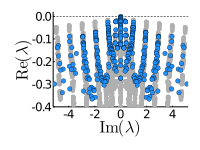

In [91]:
@unpack λ = wload(datadir("sims","channel_flow","spectrum.bson"))
j = 1150
scatter(imag.(λ),real(λ),ylim=(-0.4,0.02), xlim=(-5.2,5.2),leg=false, size=(200,150),ms=2.5,
    mc=:gray69,grid=false,markerstrokewidth=0)#,yticks=[-1,0])
xlabel!(L"\mathrm{Im}(\lambda)")
ylabel!(L"\mathrm{Re}(\lambda)")
plot!([-5.2,5.2],[0,0],lc=:black,ls=:dash,lw=0.5)
display(scatter!(imag.(lambda),real(lambda),ms=2.5,mc=:dodgerblue)) #indianred?

Save some snapshots

In [996]:
dir = datadir("sims","channel_flow","run_random_")
runs = collect(1:3)
t = collect(0.0:0.5:50.0)
X,~ = load_snapshots(dir,runs,t)
X = [reshape(Fi*X[:,i],Nx,Ny,Nz,3) for i=1:size(X,2)]
dict = @strdict X x y z Nx Ny Nz

matwrite(datadir("sims","channel_flow","random_snapshots.mat"),dict; compress=true)

Save POD modes

In [3]:
dir = datadir("sims","channel_flow","run_random_")
runs = collect(1:15)
t = collect(0.0:0.5:400)
X,~ = load_snapshots(dir,runs,t)
U,sigma,V = svd(X, full=false)
V = Array(V)
pod = @strdict U sigma V

matwrite(datadir("sims","channel_flow","random15_snapshots_pod.mat"),pod; compress=true)

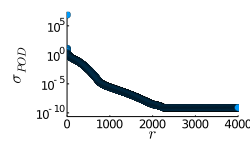

In [6]:
scatter(sigma,yscale=:log10,size=(250,150),xlim=(0,4000),grid=false,leg=false,ylabel=L"\sigma_{POD}",xlabel=L"r")

Save DMD modes

In [2]:
dir = datadir("sims","channel_flow","run_random_")
runs = collect(1:15)
t = collect(0.0:0.5:400)
X,Y = load_snapshots(dir,runs,t)
@unpack U,sigma,V = matread(datadir("sims","channel_flow","random15_snapshots_pod.mat"))
r = 1400
Ur = U[:,1:r]
U = []
sigmar = sigma[1:r]
sigma = []
Vr = V[:,1:r]
V = []
tol = 1e-16
lambda,V,W,b = DMD_from_POD(X,Y,dt,Ur,sigmar,Vr,r,tol)
V = Fi*V
W = Fi*W
dmd = @strdict lambda V W b

matwrite(datadir("sims","channel_flow","random15_snapshots_dmd.mat"),dmd; compress=true)

Compute data-driven resolvent modes

In [14]:
@unpack lambda,V = matread(datadir("sims","channel_flow","random15_snapshots_dmd.mat"))
ϕtrue,ψtrue = load_true_modes()
ϕdata,ψdata,σdata = get_modes_aligned(lambda[2:end],V[:,2:end],ϕtrue,ψtrue)
mode_error(ϕdata,ψdata,ϕtrue,ψtrue)

([0.022718306178244878, 0.012621193446366299, 0.03323967871320327, 0.69934994675988], [0.0023983585299202663, 0.0010127785575620664, 0.002803362879055693, 0.637722011823618])

Save modes

In [19]:
dirs = [datadir("sims","channel_flow","resolvent_rand_w=0.0_mode1.mat"),
        datadir("sims","channel_flow","resolvent_rand_w=0.0_mode2.mat"),
        datadir("sims","channel_flow","resolvent_rand_w=0.0_mode3.mat"),
        datadir("sims","channel_flow","resolvent_rand_w=0.4_mode1.mat")]

for i=1:4
    save_mode(dirs[i],real.(ϕdata[i]),real.(ψdata[i]))
end

Plot modes

In [6]:
Ψ,σ,Φ = opt_forcing(lambda[2:end],V[:,2:end],Q,0.0)
σ

1399-element Array{Float64,1}:
 12616.748411859793
 12614.979536167924
 11050.1158450792
 11049.949606131751
  8179.485479306423
  8177.338738557738
  4968.825933875717
  3961.1636035798592
  2964.413309982775
  1928.122496277924
  1233.098448888379
  1010.5351074828775
   713.4346141276438
     ⋮
     0.015365925277006452
     0.01377645510019385
     0.012792665877857878
     0.010457501543252696
     0.009677843132430803
     0.009223510335248868
     0.008728576752131968
     0.007909103662786264
     0.005875915079645065
     0.003575068011458404
     0.0021993897095032694
     0.0019229191031996122

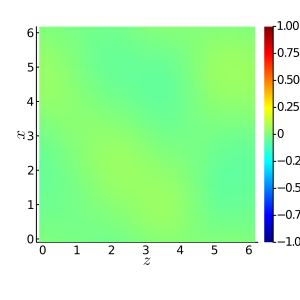

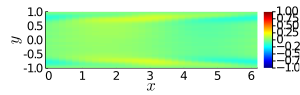

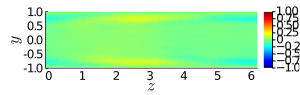

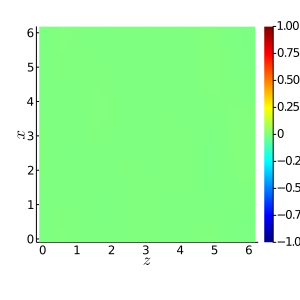

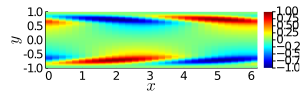

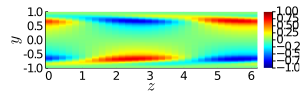

In [18]:
i = 4
u = ϕdata[i]
# u = real.(reshape(Φ[:,i],Nx,Ny,Nz,3))
x,y,z,u_zx,u_xy,u_zy = u_slices(u,2)

lim = 1
display(heatmap(z,x,u_zx/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(x,sort(y),u_xy/maximum(abs.(u)),c=:jet,xlabel=L"x",ylabel=L"y",
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,sort(y),u_zy'/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"y",
   clim=(-lim,lim), size=(300,2/(2π)*300)))

u = ψdata[i]
# u = real.(reshape(Ψ[:,i],Nx,Ny,Nz,3))
x,y,z,u_zx,u_xy,u_zy = u_slices(u,1)

lim = 1
display(heatmap(z,x,u_zx/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(x,sort(y),u_xy/maximum(abs.(u)),c=:jet,xlabel=L"x",ylabel=L"y",
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,sort(y),u_zy'/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"y",
   clim=(-lim,lim), size=(300,2/(2π)*300)))

Compute data-driven resolvent gain distribution

In [157]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
@unpack lambda,V = matread(datadir("sims","channel_flow","random15_snapshots_dmd.mat"))
Rspan_data = sqrt.(opt_gain(lambda[2:end],V[:,2:end],Q,wspan,1)[:])

dict = @strdict wspan Rspan_data
matwrite(datadir("sims","channel_flow","gain_distribution_random.mat"),dict; compress=true)

Plot gain distribution

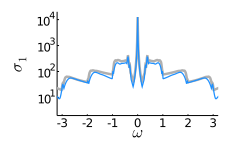

In [10]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
@unpack wspan,Rspan_data = matread(datadir("sims","channel_flow","gain_distribution_random.mat"))

plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2.5,xlim=(-3.2,3.2),ylim=(2,2*10^4),yticks=[10,1e2,1e3,1e4],
    size=(230,150),grid=false,xlabel=L"\omega",ylabel=L"\sigma_1",c=:gray69)
display(plot!(wspan,Rspan_data,lw=1.25,lc=:dodgerblue)) #indianred?
savefig(plotsdir("gain_random.pdf"))

Plot spectrum

In [11]:
@unpack λ = wload(datadir("sims","channel_flow","spectrum.bson"))
@unpack lambda = matread(datadir("sims","channel_flow","random15_snapshots_dmd.mat"));

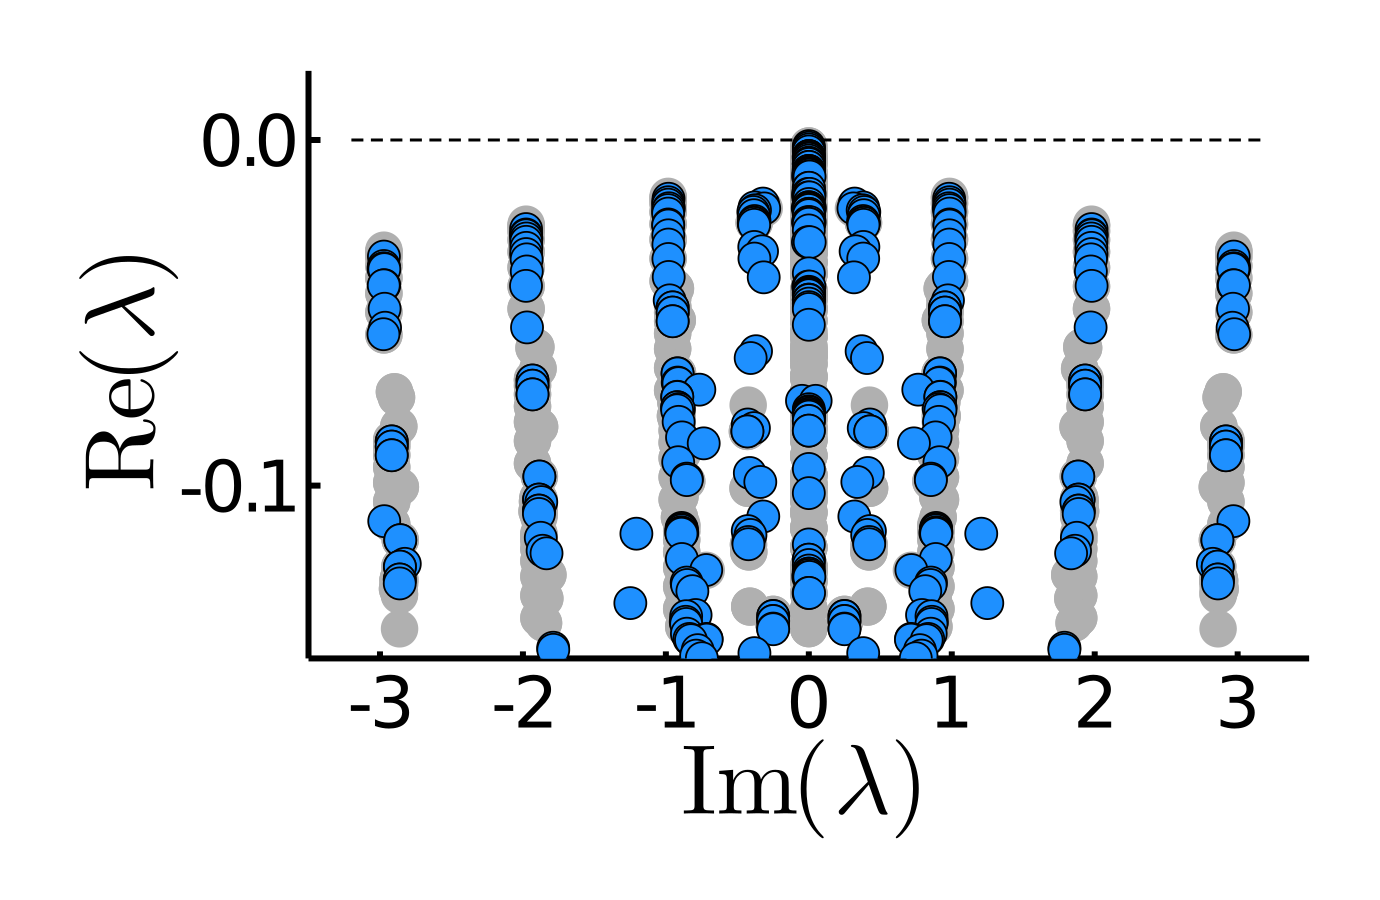

In [12]:
j = 1150
scatter(imag.(λ[1:j]),real(λ[1:j]),ylim=(-0.15,0.02), xlim=(-3.5,3.5),leg=false, size=(230,150),ms=3.5,
    mc=:gray69,grid=false,markerstrokewidth=0,yticks=[-.1,0])
xlabel!(L"\mathrm{Im}(\lambda)")
ylabel!(L"\mathrm{Re}(\lambda)")
plot!([-3.2,3.2],[0,0],lc=:black,ls=:dash,lw=0.5)
display(scatter!(imag.(lambda[2:end]),real(lambda[2:end]),ms=3,mc=:dodgerblue,dpi=600)) #indianred?
savefig(plotsdir("spectrum_random.png"))

#### Convergence study

Convergence with number of POD modes retained

In [ ]:
rs = collect(2000:-100:100)
matwrite(datadir("sims","channel_flow","convergence_n_modes.mat"),dict; compress=true)
dir = datadir("sims","channel_flow","run_random3_")
runs = collect(1:15)
t = collect(0.0:0.5:400)
X,Y = load_snapshots(dir,runs,t)
@unpack U,sigma,V = matread(datadir("sims","channel_flow","random_snapshots_pod.mat"))
ϕtrue,ψtrue = load_true_modes()
ephis = []
epsis = []
sigmas = []
tol = 1e-16
for r in rs
    λ̃,Ṽ,~,~ = DMD_from_POD(X,Y,dt,U,sigma,V,r,tol)
    Ṽ = Fi*Ṽ
    ϕdata,ψdata,σdata = get_modes_aligned(λ̃,Ṽ,ϕtrue,ψtrue)
    eϕ,eψ = mode_error(ϕdata,ψdata,ϕtrue,ψtrue)
    push!(ephis,eϕ)
    push!(epsis,eψ)
    push!(sigmas,σdata)
    display(r)
end
dict = @strdict rs ephis epsis sigmas

matwrite(datadir("sims","channel_flow","convergence_n_PODmodes.mat"),dict; compress=true)

Plot results

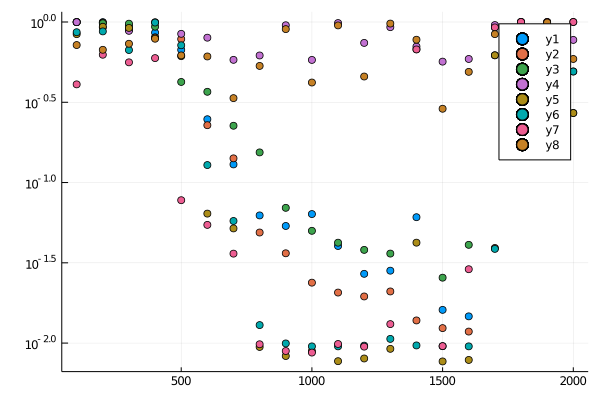

In [24]:
dict = matread(datadir("sims","channel_flow","convergence_n_PODmodes.mat"))
@unpack rs,ephis,epsis,sigmas = dict

# build figure
scatter(rs,hcat(ephis...)')
scatter!(rs,hcat(epsis...)',yscale=:log10)
# save figure

Convergence with number of DMD modes retained

In [15]:
rs = collect(1400:-25:25)
@unpack lambda,V = matread(datadir("sims","channel_flow","random15_snapshots_dmd.mat"))
lambda = lambda[2:end]
V = V[:,2:end]
ϕtrue,ψtrue = load_true_modes()
ephis = []
epsis = []
sigmas = []
for r in rs
    ϕdata,ψdata,σdata = get_modes_aligned(lambda[1:r-1],V[:,1:r-1],ϕtrue,ψtrue);
    eϕ,eψ = mode_error(ϕdata,ψdata,ϕtrue,ψtrue)
    push!(ephis,eϕ)
    push!(epsis,eψ)
    push!(sigmas,σdata)
    display(r)
end
    
dict = @strdict rs ephis epsis sigmas
matwrite(datadir("sims","channel_flow","convergence_n_DMDmodes.mat"),dict; compress=true)

1400

1375

1350

1325

1300

1275

1250

1225

1200

1175

1150

1125

1100

1075

1050

1025

1000

975

950

925

900

875

850

825

800

775

750

725

700

675

650

625

600

575

550

525

500

475

450

425

400

375

350

325

300

275

250

225

200

175

150

125

100

75

50

25

Plot results

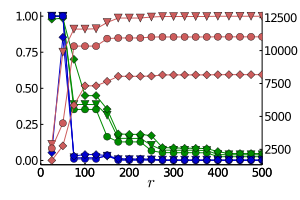

In [29]:
dict = matread(datadir("sims","channel_flow","convergence_n_DMDmodes.mat"))
@unpack rs,ephis,epsis,sigmas = dict

plot(rs,hcat(ephis...)'[:,1:3],size=(300,200),c=:green4,leg=false,xlim=(0,500),
    marker=4,markershape=[:dtriangle :circle :diamond],grid=false,xlabel=L"r")
(plot!(rs,hcat(epsis...)'[:,1:3],marker=4,markershape=[:dtriangle :circle :diamond],
        c=:blue3))
display(plot!(twinx(),rs,hcat(sigmas...)'[:,1:3],c=:indianred,leg=false,xlim=(0,500),
    marker=4,markershape=[:dtriangle :circle :diamond],grid=false))
savefig(plotsdir("chflow_convergence_r.pdf"))

Convergence with number of transients $p$ in the dataset

Compute and save POD modes for each $p$

In [2]:
runs = collect(14:-1:1)
dir = datadir("sims","channel_flow","run_random_")
t = collect(0.0:0.5:400)
m = length(t)
X,~ = load_snapshots(dir,runs[end:-1:1],t)
for p in runs
    r = 140+90*(p-1)
    U,sigma,V = svd(X[:,1:p*(m-1)], full=false)
    display("POD$(p)")
    U = U[:,1:r]
    sigma = sigma[1:r]
    V = Array(V[:,1:r])
    pod = @strdict U sigma V
    matwrite(datadir("sims","channel_flow","random$(p)_snapshots_pod.mat"),pod; compress=true)
end

"POD14"

"POD13"

"POD12"

"POD11"

"POD10"

"POD9"

"POD8"

"POD7"

"POD6"

"POD5"

"POD4"

"POD3"

"POD2"

"POD1"

Compute and save DMD modes for each $p$

In [2]:
runs = collect(14:-1:1)
dir = datadir("sims","channel_flow","run_random_")
t = collect(0.0:0.5:400)
m = length(t)
X,Y = load_snapshots(dir,runs[end:-1:1],t)
tol = 1e-16
for p in runs
    X = @view X[:,1:p*(m-1)]
    Y = @view Y[:,1:p*(m-1)]
    r = 140+90*(p-1)
    display("data $(p)")
    @unpack U,sigma,V = matread(datadir("sims","channel_flow","random$(p)_snapshots_pod.mat"))
    lambda,V,W,b = DMD_from_POD(X,Y,dt,U,sigma,V,r,tol)
    display("DMD $(p)")
    V = Fi*V
    W = Fi*W
    dmd = @strdict lambda V W b
    matwrite(datadir("sims","channel_flow","random$(p)_snapshots_dmd.mat"),dmd; compress=true)
end

"data 14"

"DMD 14"

"data 13"

"DMD 13"

"data 12"

"DMD 12"

"data 11"

"DMD 11"

"data 10"

"DMD 10"

"data 9"

"DMD 9"

"data 8"

"DMD 8"

"data 7"

"DMD 7"

"data 6"

"DMD 6"

"data 5"

"DMD 5"

"data 4"

"DMD 4"

"data 3"

"DMD 3"

"data 2"

"DMD 2"

"data 1"

"DMD 1"

Compute and save mode errors for each $p$

In [3]:
runs = collect(15:-1:1)
ephis = []
epsis = []
sigmas = []
ϕtrue,ψtrue = load_true_modes()
for p in runs
    @unpack lambda,V = matread(datadir("sims","channel_flow","random$(p)_snapshots_dmd.mat"))
    ϕdata,ψdata,σdata = get_modes_aligned(lambda[2:end],V[:,2:end],ϕtrue,ψtrue)
    eϕ,eψ = mode_error(ϕdata,ψdata,ϕtrue,ψtrue)
    push!(ephis,eϕ)
    push!(epsis,eψ)
    push!(sigmas,σdata)
end
    
dict = @strdict runs ephis epsis sigmas
matwrite(datadir("sims","channel_flow","convergence_n_runs.mat"),dict; compress=true)

Plot results

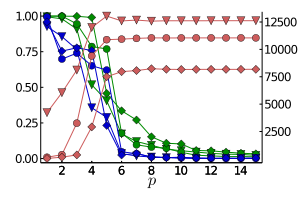

In [28]:
dict = matread(datadir("sims","channel_flow","convergence_n_runs.mat"))
@unpack runs,ephis,epsis,sigmas = dict

plot(runs,hcat(ephis...)'[:,1:3],size=(300,200),c=:green4,leg=false,
    marker=4,markershape=[:dtriangle :circle :diamond],grid=false,xlabel=L"p")
plot!(runs,hcat(epsis...)'[:,1:3],marker=4,markershape=[:dtriangle :circle :diamond],
        c=:blue3)
display(plot!(twinx(),runs,hcat(sigmas...)'[:,1:3],c=:indianred,leg=false,yticks=collect(2500:2500:12500),#yscale=:log10,
    marker=4,markershape=[:dtriangle :circle :diamond],grid=false))
savefig(plotsdir("chflow_convergence_p.pdf"))

### Dataset 2: optimal forcing

Save some snapshots

In [101]:
dir = datadir("sims","channel_flow","run_optimal_w=0.0")
t = collect(0.0:0.5:50.0)
X,~ = load_snapshots(dir,t)
X = [reshape(Fi*X[:,i],Nx,Ny,Nz,3) for i=1:size(X,2)]
dict = @strdict X x y z Nx Ny Nz

matwrite(datadir("sims","channel_flow","optimal_snapshots.mat"),dict; compress=true)

Save POD modes

In [103]:
dir = datadir("sims","channel_flow","run_optimal_w=0.0")
t = collect(0.0:0.5:400.0)
X,Y = load_snapshots(dir,t)
U,sigma,V = svd(X, full=false)
V = Array(V)
pod = @strdict U sigma V

matwrite(datadir("sims","channel_flow","optimal_snapshots_pod.mat"),pod; compress=true)

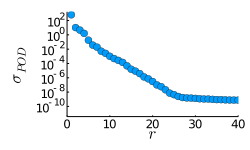

In [104]:
scatter(sigma,yscale=:log10,size=(250,150),xlim=(0,40),grid=false,leg=false,ylabel=L"\sigma_{POD}",xlabel=L"r")

Save DMD modes

In [105]:
dir = datadir("sims","channel_flow","run_optimal_w=0.0")
t = collect(0.0:0.5:400.0)
X,Y = load_snapshots(dir,t)
@unpack U,sigma,V = matread(datadir("sims","channel_flow","optimal_snapshots_pod.mat"))
r = 20
tol = 1e-16
dt = 0.5
lambda,V,W,b = DMD_from_POD(X,Y,dt,U,sigma,V,r,tol)
V = Fi*V
W = Fi*W
dmd = @strdict lambda V W b

matwrite(datadir("sims","channel_flow","optimal_snapshots_dmd.mat"),dmd; compress=true)

Compute data-driven resolvent modes

In [108]:
@unpack lambda,V = matread(datadir("sims","channel_flow","optimal_snapshots_dmd.mat"))
ϕtrue,ψtrue = load_true_modes()
ϕdata,ψdata,σdata = get_modes_aligned(lambda,V,ϕtrue,ψtrue)
display(mode_error(ϕdata,ψdata,ϕtrue,ψtrue))

([0.000763102189644605, 1.0000000000000189, 0.9999999999999526, 1.0000000000000047], [0.0009162205852353109, 0.9999999999996213, 0.9999999999557527, 1.000000000000007])

Save modes

In [109]:
dirs = [datadir("sims","channel_flow","resolvent_optimal_w=0.0_mode1.mat"),
        datadir("sims","channel_flow","resolvent_optimal_w=0.0_mode2.mat"),
        datadir("sims","channel_flow","resolvent_optimal_w=0.0_mode3.mat"),
        datadir("sims","channel_flow","resolvent_optimal_w=0.4_mode1.mat")]

for i=1:4
    save_mode(dirs[i],real.(ϕdata[i]),real.(ψdata[i]))
end

Plot modes

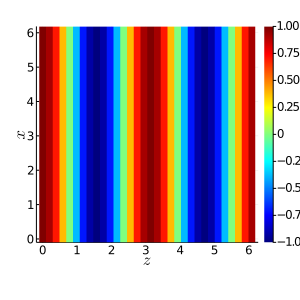

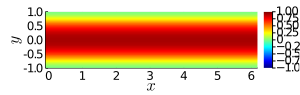

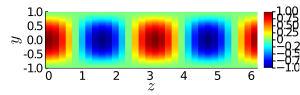

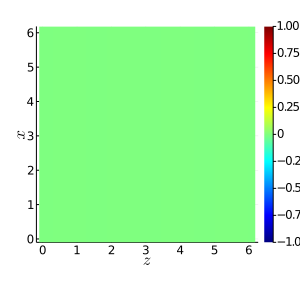

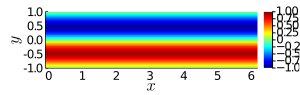

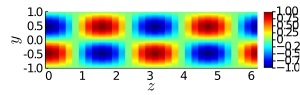

In [110]:
i = 1
x,y,z,u_zx,u_xy,u_zy = u_slices(ϕdata[i],2)

lim = 1
display(heatmap(z,x,u_zx/maximum(abs.(ϕdata[i])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(x,sort(y),u_xy/maximum(abs.(ϕdata[i])),c=:jet,xlabel=L"x",ylabel=L"y",
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,sort(y),u_zy'/maximum(abs.(ϕdata[i])),c=:jet,xlabel=L"z",ylabel=L"y",
   clim=(-lim,lim), size=(300,2/(2π)*300)))

x,y,z,u_zx,u_xy,u_zy = u_slices(ψdata[i],1)

lim = 1
display(heatmap(z,x,u_zx/maximum(abs.(ψdata[i])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(x,sort(y),u_xy/maximum(abs.(ψdata[i])),c=:jet,xlabel=L"x",ylabel=L"y",
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,sort(y),u_zy'/maximum(abs.(ψdata[i])),c=:jet,xlabel=L"z",ylabel=L"y",
   clim=(-lim,lim), size=(300,2/(2π)*300)))

Compute data-driven resolvent gain distribution

In [111]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
@unpack lambda,V = matread(datadir("sims","channel_flow","optimal_snapshots_dmd.mat"))
Rspan_data = sqrt.(opt_gain(lambda,V,Q,wspan,1)[:])

dict = @strdict wspan Rspan_data
matwrite(datadir("sims","channel_flow","gain_distribution_optimal.mat"),dict; compress=true)

Plot gain distribution

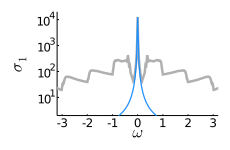

In [14]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
@unpack wspan,Rspan_data = matread(datadir("sims","channel_flow","gain_distribution_optimal.mat"))

plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2.5,xlim=(-3.2,3.2),ylim=(2,2*10^4),yticks=[10,1e2,1e3,1e4],
    size=(230,150),grid=false,xlabel=L"\omega",ylabel=L"\sigma_1",c=:gray69)
display(plot!(wspan[1:5:end],Rspan_data[1:5:end],lw=1.25,lc=:dodgerblue)) #indianred?
savefig(plotsdir("gain_optimal.pdf"))

Plot spectrum

In [15]:
@unpack λ = wload(datadir("sims","channel_flow","spectrum.bson"))
@unpack lambda = matread(datadir("sims","channel_flow","optimal_snapshots_dmd.mat"));

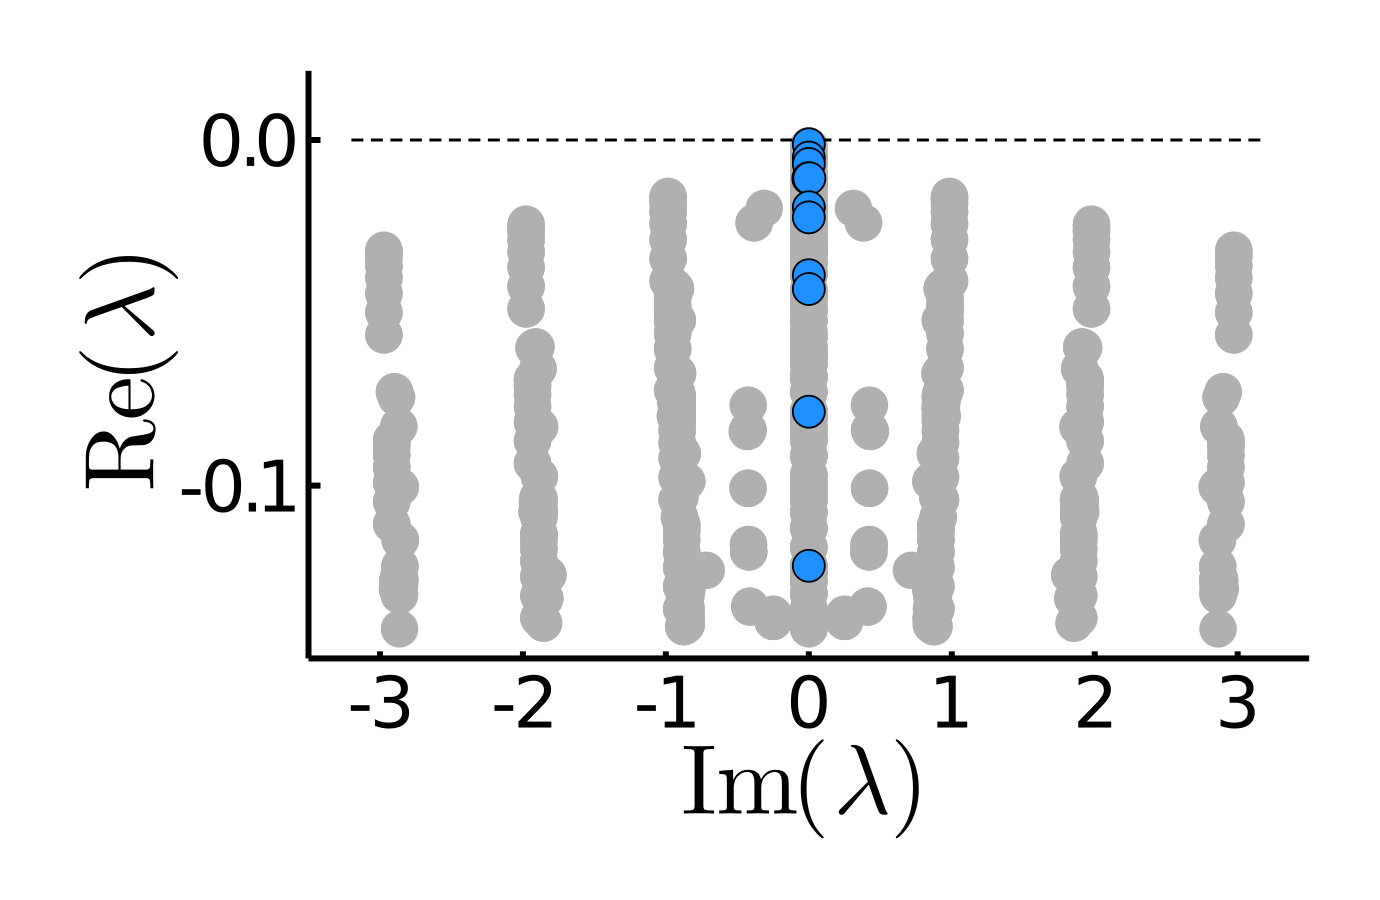

In [16]:
j = 1150
scatter(imag.(λ[1:j]),real(λ[1:j]),ylim=(-0.15,0.02), xlim=(-3.5,3.5),leg=false, size=(230,150),ms=3.5,
    mc=:gray69,grid=false,markerstrokewidth=0,yticks=[-.1,0])
xlabel!(L"\mathrm{Im}(\lambda)")
ylabel!(L"\mathrm{Re}(\lambda)")
plot!([-3.2,3.2],[0,0],lc=:black,ls=:dash,lw=0.5)
display(scatter!(imag.(lambda),real(lambda),ms=3,mc=:dodgerblue,dpi=600)) #indianred?
savefig(plotsdir("spectrum_optimal.png"))

### Dataset 3: localized impulse

Save some snapshots

In [30]:
dir = datadir("sims","channel_flow","run_localized")
t = collect(0.0:0.5:50.0)
X,~ = load_snapshots(dir,t)
X = [reshape(Fi*X[:,i],Nx,Ny,Nz,3) for i=1:size(X,2)]
dict = @strdict X x y z Nx Ny Nz

matwrite(datadir("sims","channel_flow","localized_snapshots.mat"),dict; compress=true)

Save POD modes

In [31]:
dir = datadir("sims","channel_flow","run_localized")
t = collect(0.0:0.5:400.0)
X,Y = load_snapshots(dir,t)
U,sigma,V = svd(X, full=false)
V = Array(V)
pod = @strdict U sigma V

matwrite(datadir("sims","channel_flow","localized_snapshots_pod.mat"),pod; compress=true)

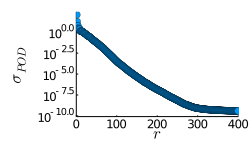

In [32]:
scatter(sigma,yscale=:log10,size=(250,150),xlim=(0,400),grid=false,leg=false,ylabel=L"\sigma_{POD}",xlabel=L"r")

Save DMD modes

In [92]:
dir = datadir("sims","channel_flow","run_localized")
t = collect(0.0:0.5:400.0)
X,Y = load_snapshots(dir,t)
@unpack U,sigma,V = matread(datadir("sims","channel_flow","localized_snapshots_pod.mat"))
r = 200
tol = 1e-16
lambda,V,W,b = DMD_from_POD(X,Y,dt,U,sigma,V,r,tol)
V = Fi*V
W = Fi*W
dmd = @strdict lambda V W b

matwrite(datadir("sims","channel_flow","localized_snapshots_dmd.mat"),dmd; compress=true)

Compute data-driven resolvent modes

In [93]:
@unpack lambda,V = matread(datadir("sims","channel_flow","localized_snapshots_dmd.mat"))
ϕtrue,ψtrue = load_true_modes()
ϕdata,ψdata,σdata = get_modes_aligned(lambda,V,ϕtrue,ψtrue)
display(mode_error(ϕdata,ψdata,ϕtrue,ψtrue))

([0.8910786669398416, 0.9999999038179056, 0.9999998657002492, 0.9982866889568927], [0.6845537649261962, 0.9991413882477896, 0.9974243538129606, 0.8802020947411453])

Save modes

In [94]:
dirs = [datadir("sims","channel_flow","resolvent_localized_w=0.0_mode1.mat"),
        datadir("sims","channel_flow","resolvent_localized_w=0.0_mode2.mat"),
        datadir("sims","channel_flow","resolvent_localized_w=0.0_mode3.mat"),
        datadir("sims","channel_flow","resolvent_localized_w=0.4_mode1.mat")]

for i=1:4
    save_mode(dirs[i],real.(ϕdata[i]),real.(ψdata[i]))
end

Plot modes

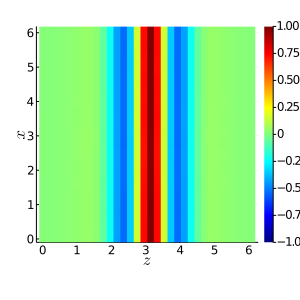

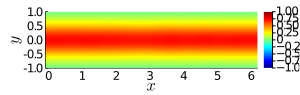

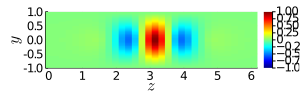

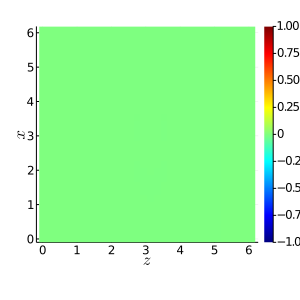

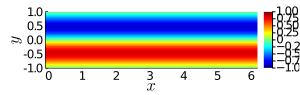

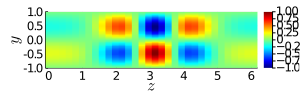

In [95]:
i = 1
u = ϕdata[i]
x,y,z,u_zx,u_xy,u_zy = u_slices(u,2)

lim = 1
display(heatmap(z,x,u_zx/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(x,sort(y),u_xy/maximum(abs.(u)),c=:jet,xlabel=L"x",ylabel=L"y",
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,sort(y),u_zy'/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"y",
   clim=(-lim,lim), size=(300,2/(2π)*300)))

u = ψdata[i]
x,y,z,u_zx,u_xy,u_zy = u_slices(u,1)

lim = 1
display(heatmap(z,x,u_zx/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(x,sort(y),u_xy/maximum(abs.(u)),c=:jet,xlabel=L"x",ylabel=L"y",
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,sort(y),u_zy'/maximum(abs.(u)),c=:jet,xlabel=L"z",ylabel=L"y",
   clim=(-lim,lim), size=(300,2/(2π)*300)))

Compute data-driven resolvent gain distribution

In [96]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
@unpack lambda,V = matread(datadir("sims","channel_flow","localized_snapshots_dmd.mat"))
Rspan_data = sqrt.(opt_gain(lambda,V,Q,wspan,1)[:])

dict = @strdict wspan Rspan_data
matwrite(datadir("sims","channel_flow","gain_distribution_localized.mat"),dict; compress=true)

Plot gain distribution

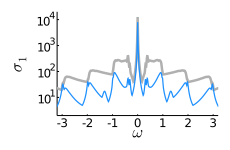

In [17]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
@unpack wspan,Rspan_data = matread(datadir("sims","channel_flow","gain_distribution_localized.mat"))

plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2.5,xlim=(-3.2,3.2),ylim=(2,2*10^4),yticks=[10,1e2,1e3,1e4],
    size=(230,150),grid=false,xlabel=L"\omega",ylabel=L"\sigma_1",c=:gray69)
display(plot!(wspan,Rspan_data,lw=1.25,lc=:dodgerblue)) #indianred?
savefig(plotsdir("gain_localized.pdf"))

Plot spectrum

In [18]:
@unpack λ = wload(datadir("sims","channel_flow","spectrum.bson"))
@unpack lambda = matread(datadir("sims","channel_flow","localized_snapshots_dmd.mat"));

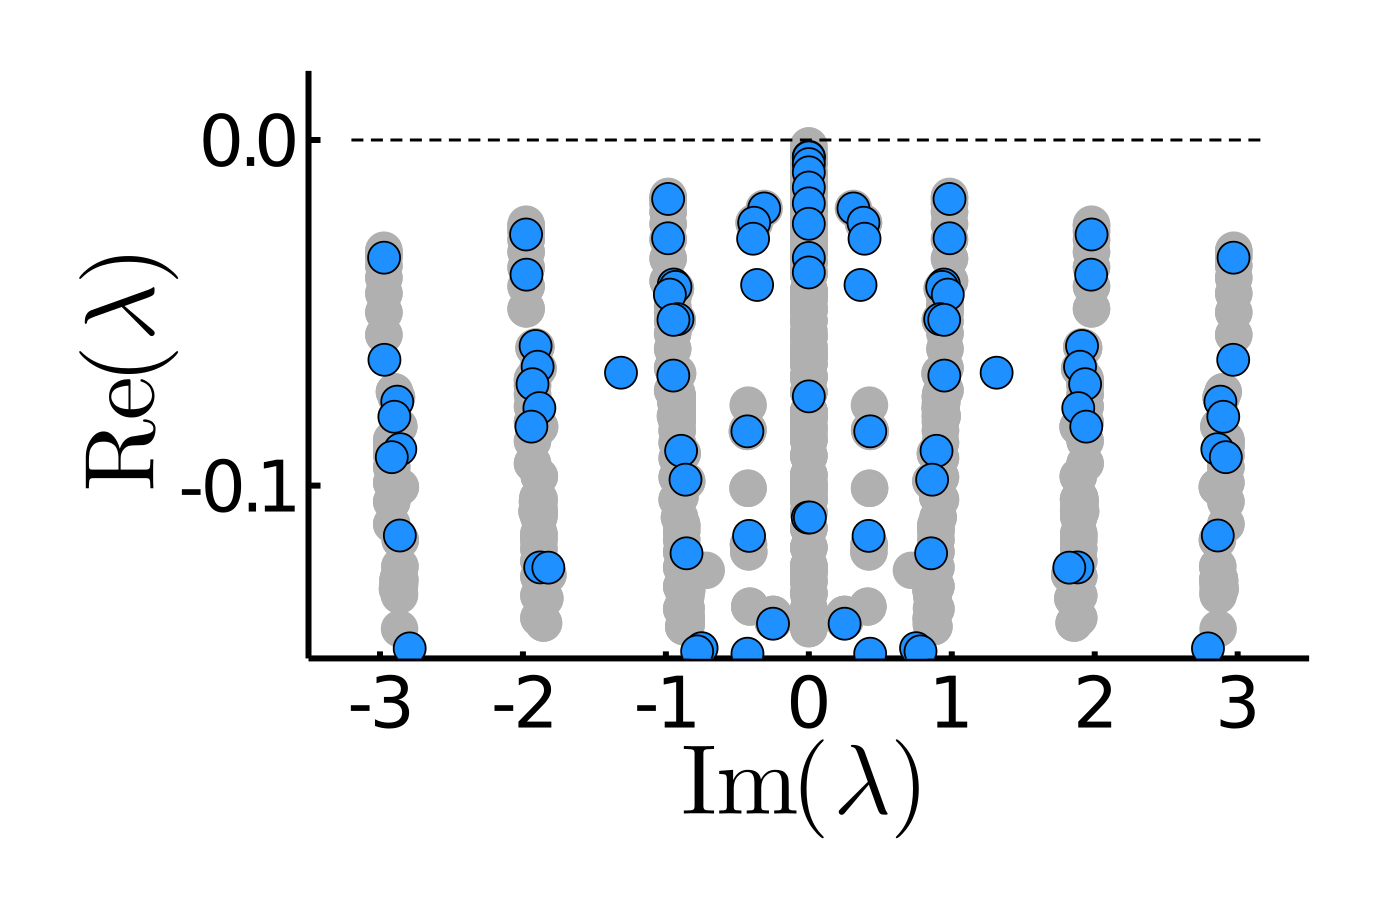

In [19]:
j = 1150
scatter(imag.(λ[1:j]),real(λ[1:j]),ylim=(-0.15,0.02), xlim=(-3.5,3.5),leg=false, size=(230,150),ms=3.5,
    mc=:gray69,grid=false,markerstrokewidth=0,yticks=[-.1,0])
xlabel!(L"\mathrm{Im}(\lambda)")
ylabel!(L"\mathrm{Re}(\lambda)")
plot!([-3.2,3.2],[0,0],lc=:black,ls=:dash,lw=0.5)
display(scatter!(imag.(lambda),real(lambda),ms=3,mc=:dodgerblue,dpi=600)) #indianred?
savefig(plotsdir("spectrum_localized.png"))

Compute and save projected resolvent modes

In [2]:
dir = datadir("sims","channel_flow","run_localized")
t = collect(0.0:0.5:400.0)
X,~ = load_snapshots(dir,t)
ϕtrue,ψtrue = load_mode(datadir("sims","channel_flow","resolvent_truth_w=0.0_mode1.mat"))
ϕdata,ψdata = load_mode(datadir("sims","channel_flow","resolvent_localized_w=0.0_mode1.mat"))

ϕp = real.(Fi*X/(X'*X)*(X'*F*(ϕtrue[:])))
ϕp = reshape(ϕp,Nx,Ny,Nz,3)
ϕp = ϕp/energy(ϕp)
ψp = real.(Fi*X/(X'*X)*(X'*F*(u_response(ϕp)[:])))
ψp = reshape(ψp,Nx,Ny,Nz,3)
ψp = ψp/energy(ψp)

display(energy(ϕp-ϕdata))
display(energy(ψp-ψdata))

dir = datadir("sims","channel_flow","resolvent_localized_projected.mat")
save_mode(dir,real.(ϕp),real.(ψp))

32×65×32×3 Array{Float64,4}:
[:, :, 1, 1] =
  0.000874072    3.45814   13.8243   …  -13.8179   -3.45736   0.000873655
  7.78958e-5     3.49336   13.961       -13.954    -3.49038   7.7799e-5
 -0.000210851    3.53499   14.1303      -14.1246   -3.53376  -0.000210673
 -0.000580519    3.41466   13.6471      -13.6455   -3.41336  -0.000580058
 -0.00019151     2.85431   11.4091      -11.4106   -2.85479  -0.000191808
  0.000511497    1.46633    5.85974  …   -5.87255  -1.46925   0.000511497
  0.000265718   -1.20813   -4.82947       4.79943   1.1998    0.000265241
  0.000316381   -5.49726  -21.9777       21.9369    5.48715   0.000316352
  5.56596e-5   -11.2366   -44.9207       44.891    11.2288    5.57806e-5
 -8.68291e-5   -17.3582   -69.3956       69.3861   17.3566   -8.67248e-5
 -0.000203077  -21.7017   -86.7581   …   86.7775   21.7062   -0.000203095
  0.000354894  -21.3647   -85.4128       85.4639   21.3776    0.000355169
 -1.44094e-5   -13.9011   -55.5762       55.6203   13.9119   -1.43889e-5

## Operator-based resolvent analysis

Global modes and spectrum

In [231]:
nx, nz = [14,14]
@time A,Aadj,B,C,Q̂ = pois_operator_global(nx,Ny,nz,R)

@time λ, V = eigen(Array(A), sortby=x->-real(x))
@time W = Array(sparse(V)'*A'*Q̂)\Diagonal(conj.(λ))

r = 10000    
V = normalize_basis(sparse(V[:,1:r]),Q̂)
W = normalize_basis(sparse(W[:,1:r]),Q̂)
for i=1:r
    V[:,i] = V[:,i]/(W[:,i]'*Q̂*V[:,i])
end

lambda = λ[1:r]
V = Array(V)
W = Array(W)

dict = @strdict lambda V W
matwrite(datadir("sims","channel_flow","global_modes_truth.mat"),dict; compress=true)

  2.756582 seconds (53.90 k allocations: 6.376 GiB, 45.72% gc time)


(
  [1    ,     1]  =  -1565.76-0.0108994im
  [2    ,     1]  =  -1313.67-0.0808837im
  [3    ,     1]  =  -1268.5-0.0522001im
  [4    ,     1]  =  -1213.49-0.0714265im
  [5    ,     1]  =  -1112.88-0.0453725im
  [6    ,     1]  =  -1024.1-0.0614402im
  [7    ,     1]  =  -913.4-0.0357744im
  [8    ,     1]  =  -811.502-0.0504238im
  [9    ,     1]  =  -702.869-0.025608im
  [10   ,     1]  =  -604.581-0.0396657im
  [11   ,     1]  =  -508.694-0.0163023im
  [12   ,     1]  =  -424.52-0.0302052im
  ⋮
  [14100, 14112]  =  -0.0203543+0.0im
  [14101, 14112]  =  0.0276673+0.0im
  [14102, 14112]  =  -0.038749+0.0im
  [14103, 14112]  =  0.0562299+0.0im
  [14104, 14112]  =  -0.0851766+0.0im
  [14105, 14112]  =  0.136072+0.0im
  [14106, 14112]  =  -0.232638+0.0im
  [14107, 14112]  =  0.435163+0.0im
  [14108, 14112]  =  -0.923033+0.0im
  [14109, 14112]  =  2.36752+0.0im
  [14110, 14112]  =  -8.41976+0.0im
  [14111, 14112]  =  62.3585+0.0im
  [14112, 14112]  =  -369.729+0.0im, 
  [1    ,     1]  =

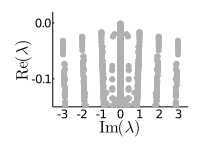

In [242]:
r = 10000                           

scatter(imag.(λ[1:r]),real(λ[1:r]),ylim=(-0.15,0.02), xlim=(-3.5,3.5),leg=false, size=(200,150),ms=3.5,
    mc=:gray69,grid=false,markerstrokewidth=0,yticks=[-.1,0])

scatter!(-imag.(λ[1:r]),real(λ[1:r]),ylim=(-0.15,0.02), xlim=(-3.5,3.5),leg=false, size=(200,150),ms=3.5,
    mc=:gray69,grid=false,markerstrokewidth=0,yticks=[-.1,0])

xlabel!(L"\mathrm{Im}(\lambda)")
ylabel!(L"\mathrm{Re}(\lambda)")

 66.983472 seconds (368.27 k allocations: 173.182 GiB, 11.36% gc time)


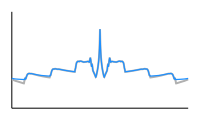

In [245]:
wspan = collect(-3.5:0.01:3.5)
Rspan = zero(wspan)
@time Rspan[1:length(wspan)÷2+1] =
    sqrt.(opt_gain_sparse(lambda,sparse(V),Q̂,wspan[1:length(wspan)÷2+1])[:])
Rspan[length(wspan)÷2+1:end] = Rspan[length(wspan)÷2+1:-1:1]

plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2,xlim=(-3.5,3.5),ylim=(1,10^5),size=(200,120),
    grid=false,ticks=false,c=:gray69)
plot!(wspan,Rspan,lw=1.25,lc=:dodgerblue)

Global resolvent gain distribution

In [47]:
N = 101
α = collect(-7:7)
β = collect(-7:7)
allparams = @dict α β R
dicts = dict_list(allparams)
r = 60
wspan = collect(-3.5:0.01:3.5)
ℛ = []
for dict in dicts
    @unpack α,β,R = dict
    if α≠0 || β≠0
        Atmp,Qtmp = pois_operator(N,[α,β,R])
        λtmp,Vtmp,~ = eigen_dual(Atmp,Qtmp)
        ℛtmp = sqrt.(opt_gain(λtmp[1:r],Vtmp[:,1:r],Qtmp,wspan,1))
        push!(ℛ,ℛtmp)
    end
end

Rspan = zeros(length(wspan))
for i=1:length(wspan)
    Rspan[i] = maximum(vcat(ℛ...)[:,i])
end

dict = @strdict wspan Rspan
matwrite(datadir("sims","channel_flow","gain_distribution_truth.mat"),dict; compress=true)

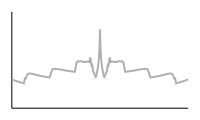

In [731]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2,xlim=(-3.5,3.5),ylim=(1,10^5),size=(200,120),
    grid=false,ticks=false,c=:gray69)

Compute and save operator-based resolvent modes

In [129]:
ω,α,β = [0.0,0.0,2.0]
j = 1
A,M = pois_operator(Ny,[α,β,R])
Ψ,~,Φ = opt_forcing(A,Array(M),ω)
phi = real.(q̂2u(Φ[:,j],α,β,Nx,Nz)[:])
psi = real.(q̂2u(Ψ[:,j],α,β,Nx,Nz)[:])
phi = reshape(phi,Nx,Ny,Nz,3)
psi = reshape(psi,Nx,Ny,Nz,3)
dir = datadir("sims","channel_flow","resolvent_truth_w=$(ω)_mode1.mat")
save_mode(dir,phi,psi)

ω,α,β = [0.0,0.0,1.0]
A,M = pois_operator(Ny,[α,β,R])
Ψ,~,Φ = opt_forcing(A,Array(M),ω)
phi = real.(q̂2u(Φ[:,j],α,β,Nx,Nz)[:])
psi = real.(q̂2u(Ψ[:,j],α,β,Nx,Nz)[:])
phi = reshape(phi,Nx,Ny,Nz,3)
psi = reshape(psi,Nx,Ny,Nz,3)
dir = datadir("sims","channel_flow","resolvent_truth_w=$(ω)_mode2.mat")
save_mode(dir,phi,psi)

ω,α,β = [0.0,0.0,3.0]
A,M = pois_operator(Ny,[α,β,R])
Ψ,~,Φ = opt_forcing(A,Array(M),ω)
phi = real.(q̂2u(Φ[:,j],α,β,Nx,Nz)[:])
psi = real.(q̂2u(Ψ[:,j],α,β,Nx,Nz)[:])
phi = reshape(phi,Nx,Ny,Nz,3)
psi = reshape(psi,Nx,Ny,Nz,3)
dir = datadir("sims","channel_flow","resolvent_truth_w=$(ω)_mode3.mat")
save_mode(dir,phi,psi)

ω,α,β = [0.4,1.0,1.0]
A,M = pois_operator(Ny,[α,β,R])
Ψ,~,Φ = opt_forcing(A,Array(M),ω)
phi = real.(q̂2u(Φ[:,j],α,β,Nx,Nz)[:])
psi = real.(q̂2u(Ψ[:,j],α,β,Nx,Nz)[:])
phi = reshape(phi,Nx,Ny,Nz,3)
psi = reshape(psi,Nx,Ny,Nz,3)
dir = datadir("sims","channel_flow","resolvent_truth_w=$(ω)_mode1.mat")
save_mode(dir,phi,psi)
;

### work in progress

62
  1.519919 seconds (6.66 k allocations: 421.611 MiB, 2.74% gc time)
  1.091932 seconds (8.21 k allocations: 525.374 MiB, 4.31% gc time)
  1.581632 seconds (7.99 k allocations: 577.214 MiB, 3.21% gc time)
  5.550962 seconds (368.55 k allocations: 14.283 GiB, 23.16% gc time)


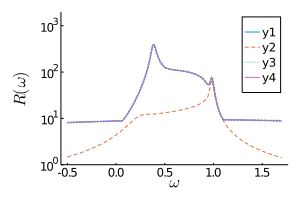

In [1854]:
using ControlSystems

N = 64
R = 2000.0
α,β = [1.0,1.0]
A,Q = pois_operator(N,[α,β,R])
λ,V,W = eigen_dual(A,Q)
Q = Array(Q)
F = factorize_weights(Q)
Fi = F\I
r = 2*N-4
λr = λ[1:r]
Vr = V[:,1:r]
Wr = W[:,1:r]
NB = (N-2)
B = [zeros(2*N-4-NB,NB); Array(I(NB))]
M = exp(A*dt)
Co = ctrb(M,B)
println(rank(Co))
U = svd(Co,full=false).U

B = B/(B'*B)*B'
BB = F*U*U'*Fi

C = B'
CC = BB'

# B = I(2N-4)
# C = I(2N-4)

ωspan = collect(-0.5:0.01:1.7)
@time R = opt_gain(A,Array(Q),ωspan,1)
@time RB = opt_gain(C,A,B,Q,Q,ωspan,1)
@time Rctrb = opt_gain(CC,A,BB,Q,Q,ωspan,1)
@time RP = projected_opt_gain(A,Q,U,ωspan)

plot(ωspan,sqrt.(R)',yscale=:log10,size=(300,200),
    grid=false,xlabel=L"\omega",ylabel=L"R(\omega)",ylim=(1,2000))
plot!(ωspan,sqrt.(RB)',ls=:dash)
plot!(ωspan,sqrt.(Rctrb)',ls=:dot,lw=2)
plot!(ωspan,sqrt.(RP)')

In [1896]:
function projected_opt_forcing(A,Q,U,ω)
    Ψ,σ,Φ = opt_forcing(A,Q,ω)
    Σ = Diagonal(σ)
    F = factorize_weights(Q)
    Fi = F\I
    Φ̃ = Fi*U/(U'*U)*(U'*F*Φ)
    Ψ̃ = Fi*U/(U'*U)*(U'*F*Ψ*Σ*Φ'*Q*Φ̃)
    σ̃ = zeros(size(σ))
    for j = 1:size(Φ̃,2)
        σ̃[j] = norm(F*Ψ̃[:,j])/norm(F*Φ̃[:,j])
    end
    p = sortperm(-σ̃)
    σ̃ = σ̃[p]
    Φ̃ = Φ̃[:,p]
    Ψ̃ = Ψ̃[:,p]
    return Ψ̃,σ̃,Φ̃
end

function projected_opt_gain(A,Q,U,ωspan)
    R = []
    for ω in ωspan
        ~,σ,~ = projected_opt_forcing(A,Q,U,ω)
        push!(R,σ[1]^2)
    end
    R = hcat(R...)
    return R
end

projected_opt_gain (generic function with 1 method)

In [1761]:
function gain(A,Q,f,ω)
    Ψ,σ,Φ = opt_forcing(A,Q,ω)
    Σ = Diagonal(σ)
    F = factorize_weights(Q)
    Fi = F\I
    sigma = norm(F*Ψ*Σ*Φ'*Q*f)/norm(F*f)
    return sigma
end

function gain_dist(A,Q,f,ωspan)
    R = []
    for ω in ωspan
        push!(R,gain(A,Q,f,ω).^2)
    end
    R = hcat(R...)
    return R
end

gain_dist (generic function with 1 method)

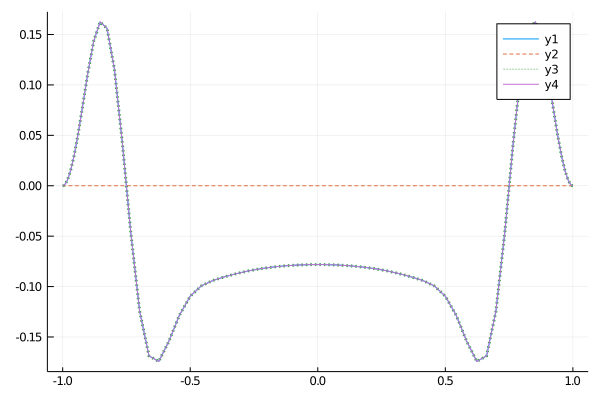

In [1851]:
ω = ωspan[argmax(R[:])]
j = 1
Ψ,σ,Φ = opt_forcing(A,Q,ω)
ΨB,σB,ΦB = opt_forcing(C,A,B,Q,Q,ω)
Ψctrb,σctrbb,Φctrb = opt_forcing(CC,A,BB,Q,Q,ω)
Ψ̃,σ̃,Φ̃ = projected_opt_forcing(A,Q,U,ω)

y = cheb_grid(N)
plot(y,[0;real.(Φ[1:N-2,j]);0])
plot!(y,[0;real.(ΦB[1:N-2,j]);0], ls=:dash)
plot!(y,[0;real.(Φctrb[1:N-2,j]);0],ls=:dot,lw=3)
plot!(y,[0;real.(Φ̃[1:N-2,j]);0])

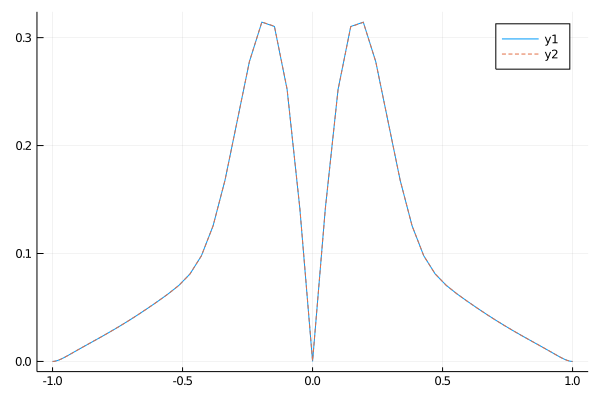

In [262]:
plot(y,[0;abs.(Ψ[1:N-2,1]);0])
plot!(y,[0;abs.(Ψ̃[1:N-2,1]);0],ls=:dash)

In [ ]:
# Fi*X/(X'*X)*(X'*F)

In [356]:
nx, nz = [14,14]
@time A,Aadj,B,C,Q̂ = pois_operator_global(nx,Ny,nz,R)
@unpack lambda, V, W = matread(datadir("sims","channel_flow","global_modes_truth.mat"))
V = sparse(V)
W = sparse(W)

@unpack U = matread(datadir("sims","channel_flow","localized_snapshots_pod.mat"))
U = U[:,1:200]

b = zeros(Complex{Float64},(2*Ny-4)*((nx÷2)+1)*nz,size(U,2))

for i=1:size(U,2)
    u = permutedims(reshape(Fi*U[:,i],Nx,Ny,Nz,3),(3,2,1,4))
    û = spectral_chop(fft(u,(1,3)),nx,nz)
    b[:,i] = B*spectral_symmetry(û2ûvec_global(û,Ny),nx,Ny,nz)
end

P = b/(b'*Q̂*b)*b'*Q̂
P = sparse(P);

  2.956763 seconds (53.90 k allocations: 6.370 GiB, 48.54% gc time)


In [352]:
nx, nz = [6,16]
@time A,Aadj,B,C,Q̂ = pois_operator_global(nx,Ny,nz,R)

@unpack U = matread(datadir("sims","channel_flow","localized_snapshots_pod.mat"))
U = U[:,1:200]

b = zeros(Complex{Float64},(2*Ny-4)*((nx÷2)+1)*nz,size(U,2))

for i=1:size(U,2)
    u = permutedims(reshape(Fi*U[:,i],Nx,Ny,Nz,3),(3,2,1,4))
    û = spectral_chop(fft(u,(1,3)),nx,nz)
    b[:,i] = B*spectral_symmetry(û2ûvec_global(û,Ny),nx,Ny,nz)
end

P = b/(b'*Q̂*b)*b'*Q̂
P = sparse(P);

  1.016314 seconds (30.90 k allocations: 2.179 GiB, 56.90% gc time)


In [359]:
r = 1000
@time Ψ̂,σ,Φ̂ = opt_forcing_sparse(P,lambda[1:r],V[:,1:r],W[:,1:r],P,Q̂,Q̂,Q̂,0)
# @time Ψ̂,σ,Φ̂ = opt_forcing(Array(P),Array(A),Array(P),Array(Q̂),Array(Q̂),0)

function V̂2V(V̂,m)
    V = spzeros(3*Nx*Ny*Nz,m)
    for j=1:m
        û = spectral_pad(ûvec2û_global(spectral_symmetry(C*V̂[:,j],nx,Ny,nz),nx,Ny,nz),Nx,Nz)
        u = permutedims(real.(ifft(û,(1,3))),(3,2,1,4))
        u = u/energy(u)
        V[:,j] = u[:]
    end
    return V
end

Φ = Array(V̂2V(Φ̂,6))
Ψ = Array(V̂2V(Ψ̂,6));

458.854273 seconds (627 allocations: 29.109 GiB, 0.38% gc time)


0.04763713225477139

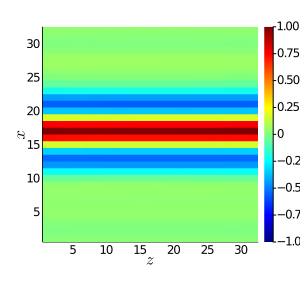

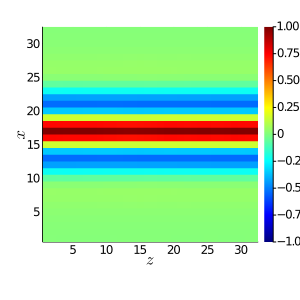

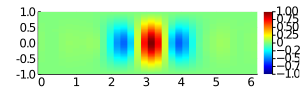

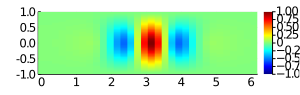

0.17476049372635835

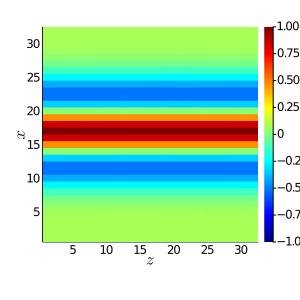

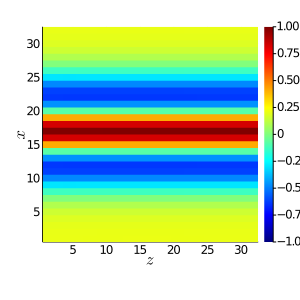

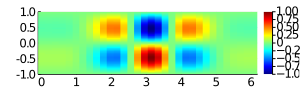

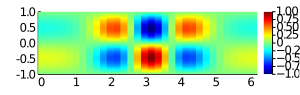

In [361]:
ϕdata,ψdata = load_mode(datadir("sims","channel_flow","resolvent_localized_w=0.0_mode1.mat"))

u = -reshape(Φ[:,1],Nx,Ny,Nz,3)
display(energy(u-ϕdata))

lim = 1
display(heatmap(u[:,33,:,2]/maximum(abs.(u[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(ϕdata[:,33,:,2]/maximum(abs.(ϕdata[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(z,y,permutedims(u[:,:,16,2],(2,1))/maximum(abs.(u[:,:,16,2])),c=:jet,
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,y,permutedims(ϕdata[:,:,16,2],(2,1))/maximum(abs.(ϕdata[:,:,16,2])),c=:jet,
    clim=(-lim,lim), size=(300,2/(2π)*300)))

u = -reshape(Ψ[:,1],Nx,Ny,Nz,3)
display(energy(u-ψdata))

lim = 1
display(heatmap(u[:,16,:,1]/maximum(abs.(u[:,16,:,1])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(ψdata[:,16,:,1]/maximum(abs.(ψdata[:,16,:,1])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(z,y,permutedims(u[:,:,16,1],(2,1))/maximum(abs.(u[:,:,16,1])),c=:jet,
    clim=(-lim,lim), size=(300,2/(2π)*300)))

display(heatmap(z,y,permutedims(ψdata[:,:,16,1],(2,1))/maximum(abs.(ψdata[:,:,16,1])),c=:jet,
    clim=(-lim,lim), size=(300,2/(2π)*300)))

In [363]:
r = 1000
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
Rspan2 = zero(Rspan)
@time Rspan2[1:length(wspan)÷2+1] =
    sqrt.(opt_gain_sparse(P,lambda[1:r],V[:,1:r],W[:,1:r],P,Q̂,Q̂,Q̂,wspan[1:length(wspan)÷2+1])[:])
Rspan2[length(wspan)÷2+1:end] = Rspan2[length(wspan)÷2+1:-1:1]

plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2,xlim=(-3.5,3.5),ylim=(1,10^5),size=(200,120),
    grid=false,ticks=false,c=:gray69)
plot!(wspan,Rspan2,lw=1.25,lc=:dodgerblue)

InterruptException: InterruptException:

In [51]:
real.(round.(Array(Wr'*Q*Vr),digits=4))

100×100 Array{Float64,2}:
 1.0   0.0   0.0   0.0   0.0  0.0   0.0  …   0.0   0.0  0.0   0.0   0.0  0.0
 0.0   1.0   0.0   0.0   0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   1.0   0.0   0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   1.0   0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   1.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0  1.0   0.0  …   0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0  -0.0   0.0  0.0   1.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0  -0.0   0.0   0.0   0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0  -0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0  0.0  -0.0  …   0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0  -0.0   0.0   0.0  0.0   0.0      0.0   0.0  0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0   0.0  0.0   0.0      0.0  

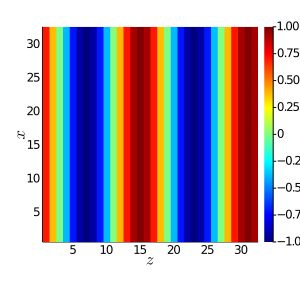

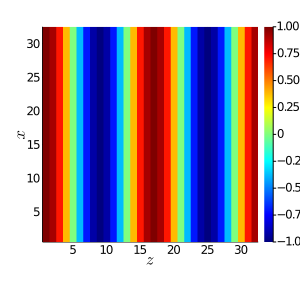

  0.717934 seconds (533 allocations: 1.337 GiB, 6.96% gc time)


In [184]:
@time Ψ,σ,Φ = opt_forcing_sparse(λr,sparse(Vr),Q,0);
# @time Ψ,σ,Φ = opt_forcing_sparse(I(r),λr,Vr,Wr,I(r),Q,Q,Q,0);

û = spectral_pad(ûvec2û_global(spectral_symmetry(C*Φ[:,1],nx,Ny,nz),nx,Ny,nz),Nx,Nz)
u = real.(ifft(û,(1,3)))
u = u/energy(u)

lim = 1
display(heatmap(u[:,33,:,2]/maximum(abs.(u[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(permutedims(ϕtrue,(3,2,1,4))[:,33,:,2]/maximum(abs.(ϕtrue[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

In [180]:
uB = base_flow(Nx,Ny,Nz)
n = length(uB)
Q = energy_weight(reshape(uB,Nx,Ny,Nz,3))

align_mode()

permutedims(ϕtrue,(3,2,1,4)

32×65×32×3 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8  …  5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8  …  5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8  …  5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8     5.96227e-8  1.66643e-8  0.0
 0.0  -1.66643e-8  -5.96227e-8  -7.59438e-8 

In [178]:
ϕtrue,ψtrue = load_mode(datadir("sims","channel_flow","resolvent_truth_w=0.0_mode1.mat"))


# display(energy(ϕp-ϕdata))

([0.0 8.336749351040832e-5 … -8.336749350622797e-5 0.0; 0.0 7.702152093103378e-5 … -7.702152092717163e-5 0.0; … ; 0.0 5.894971999173514e-5 … -5.8949719988779175e-5 0.0; 0.0 7.702152093103374e-5 … -7.702152092717159e-5 0.0]

[0.0 8.336749351040832e-5 … -8.336749350622797e-5 0.0; 0.0 7.702152093103378e-5 … -7.702152092717163e-5 0.0; … ; 0.0 5.894971999173514e-5 … -5.8949719988779175e-5 0.0; 0.0 7.702152093103374e-5 … -7.702152092717159e-5 0.0]

[0.0 8.336749351040832e-5 … -8.336749350622797e-5 0.0; 0.0 7.702152093103378e-5 … -7.702152092717163e-5 0.0; … ; 0.0 5.894971999173514e-5 … -5.8949719988779175e-5 0.0; 0.0 7.702152093103374e-5 … -7.702152092717159e-5 0.0]

...

[0.0 8.336749351040832e-5 … -8.336749350622797e-5 0.0; 0.0 7.702152093103378e-5 … -7.702152092717163e-5 0.0; … ; 0.0 5.894971999173514e-5 … -5.8949719988779175e-5 0.0; 0.0 7.702152093103374e-5 … -7.702152092717159e-5 0.0]

[0.0 8.336749351040832e-5 … -8.336749350622797e-5 0.0; 0.0 7.702152093103378e-5 … -7.702152092717163e-

  6.239325 seconds (126.15 k allocations: 30.146 GiB, 7.17% gc time)


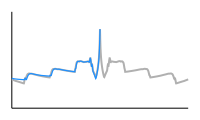

In [188]:
@unpack wspan,Rspan = matread(datadir("sims","channel_flow","gain_distribution_truth.mat"))
Rspan2 = zero(Rspan)
@time Rspan2[1:length(wspan)÷2+1] =
    sqrt.(opt_gain_sparse(λr,sparse(Vr),Q,wspan[1:length(wspan)÷2+1])[:])
# @time Rspan2[1:length(wspan)÷2+1] =
#     sqrt.(opt_gain_sparse(I(r),λr,Vr,Wr,I(r),Q,Q,Q,wspan[1:length(wspan)÷2+1])[:])
Rspan2[length(wspan)÷2+1:end] = Rspan2[length(wspan)÷2+1:-1:1]

plot(wspan,Rspan,yscale=:log10,leg=false,
    lw=2,xlim=(-3.5,3.5),ylim=(1,10^5),size=(200,120),
    grid=false,ticks=false,c=:gray69)
plot!(wspan,Rspan2,lw=1.25,lc=:dodgerblue)

In [1444]:
Nx,Ny,Nz = [32,65,32]
nx,nz = [12,12]

x = fourier_grid(Nx)
z = fourier_grid(Nz)
xx = fourier_grid(nx)
zz = fourier_grid(nz)

ûvec = C*Φ[:,1]
û = ûvec2û_global(ûvec,nx,Ny,nz)
ûpad = spectral_pad(û,Nx,Nz)
ûchop = spectral_chop(ûpad,nx,nz)


display(heatmap(real.(û)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(real.(ûpad)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(real.(ûchop)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

DimensionMismatch: DimensionMismatch("new dimensions (63, 3, 12, 12) must be consistent with array size 12096")

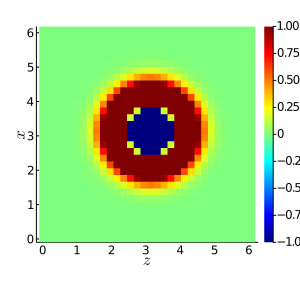

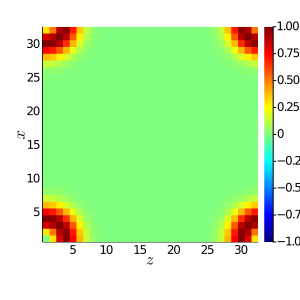

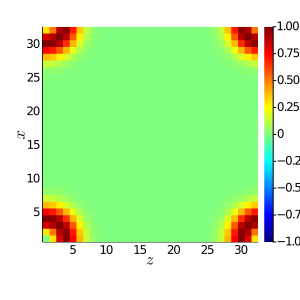

In [1198]:
uvec = Fi*X[:,1]
u = reshape(uvec,Nx,Ny,Nz,3)

display(heatmap(z,x,u[:,33,:,2],c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

û = u2û_global(u,Nx,Ny,Nz)

display(heatmap(abs.(û)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

û2 = fft(u,(1,3))
display(heatmap(abs.(û2)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

In [2]:
nx, nz = [6,6]
@time A,B,C,Q = pois_operator_global(nx,Ny,nz,R)

# dir = datadir("sims","channel_flow","run_localized")
# t = collect(0.0:0.5:400.0)
# X,~ = load_snapshots(dir,t);

@unpack U = matread(datadir("sims","channel_flow","localized_snapshots_pod.mat"))
U = U[:,1:200]

b = zeros(Complex{Float64},(2*Ny-4)*((nx÷2)+1)*nz,size(U,2))

for i=1:size(U,2)
    u = permutedims(reshape(U[:,i],Nx,Ny,Nz,3),(3,2,1,4))
    û = spectral_chop(fft(u,(1,3)),nx,nz)
    b[:,i] = B*spectral_symmetry(û2ûvec_global(û,Ny),nx,Ny,nz)
end

F = factorize_weights(Array(Q))
Fi = F\I
P = Fi*b/(b'*b)*b'*F;

  6.362931 seconds (26.92 M allocations: 1.529 GiB, 5.78% gc time)


In [3]:
# @time Ψ,σ,Φ = opt_forcing(Array(A),Array(Q),0);
@time Ψ,σ,Φ = opt_forcing(P,Array(A),P,Array(Q),Array(Q),0);
# Ψ,σ,Φ = projected_opt_forcing(Array(A),Array(Q),b,0);

 18.339490 seconds (783.22 k allocations: 2.975 GiB, 2.03% gc time)


In [4]:
σ

3024-element Array{Float64,1}:
 9412.89946639396
 2771.0366644469773
  807.3429268671468
  743.1873046060692
  394.6199496103464
  300.8436372817362
  243.39702345193606
  181.06589354955804
  142.58141124600874
  103.71286708213253
   89.09248637462323
   74.72632067002887
   49.99341784935683
    ⋮
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    6.569596456836544e-13
    2.9114623100378e-13
    4.739685291310631e-15

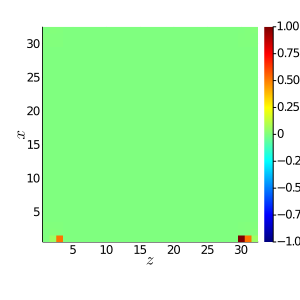

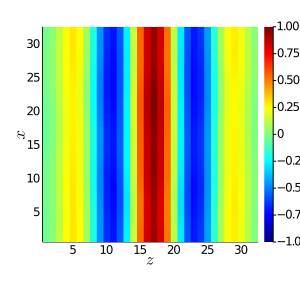

In [7]:
û = spectral_pad(ûvec2û_global(spectral_symmetry(C*Φ[:,1],nx,Ny,nz),nx,Ny,nz),Nx,Nz)
u = real.(ifft(û,(1,3)))

lim = 1
display(heatmap(abs.(û)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(u[:,33,:,2]/maximum(abs.(u[:,33,:,2])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

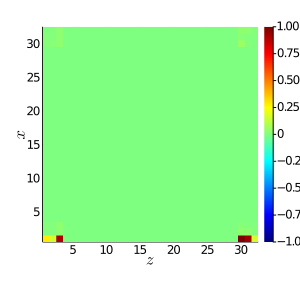

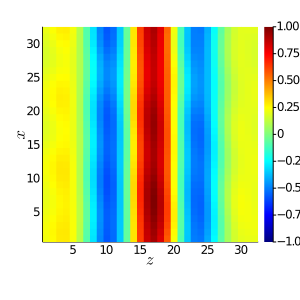

In [8]:
û = spectral_pad(ûvec2û_global(spectral_symmetry(C*Ψ[:,1],nx,Ny,nz),nx,Ny,nz),Nx,Nz)
u = real.(ifft(û,(1,3)))

display(heatmap(abs.(û)[:,16,:,1]/maximum(abs.(û[:,16,:,1])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(u[:,16,:,1]/maximum(abs.(u[:,16,:,1])),c=:jet,xlabel=L"z",ylabel=L"x",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

In [1941]:
dir = datadir("sims","channel_flow","run_localized")
t = collect(0.0:0.5:400.0)
X,~ = load_snapshots(dir,t)
ϕtrue,ψtrue = load_mode(datadir("sims","channel_flow","resolvent_truth_w=0.0_mode1.mat"))
ϕdata,ψdata = load_mode(datadir("sims","channel_flow","resolvent_localized_w=0.0_mode1.mat"))

ϕp = real.(Fi*X/(X'*X)*(X'*F*(ϕtrue[:])))
ϕp = reshape(ϕp,Nx,Ny,Nz,3)
ϕp = ϕp/energy(ϕp)
ψp = real.(Fi*X/(X'*X)*(X'*F*(u_response(ϕp)[:])))
ψp = reshape(ψp,Nx,Ny,Nz,3)
ψp = ψp/energy(ψp)

display(energy(ϕp-ϕdata))
display(energy(ψp-ψdata))

0.051405899843647886

0.16917633839891896

In [2076]:
nx = 6
α = collect(-nx÷2:(nx+1)÷2-1)
display(α)
display(ifftshift(α))
display(-α[(nx÷2):-1:2-nx%2])
display(ifftshift(α)[2:((nx+1)÷2)])

6-element Array{Int64,1}:
 -3
 -2
 -1
  0
  1
  2

6-element Array{Int64,1}:
  0
  1
  2
 -3
 -2
 -1

2-element Array{Int64,1}:
 1
 2

2-element Array{Int64,1}:
 1
 2

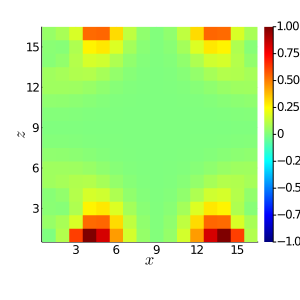

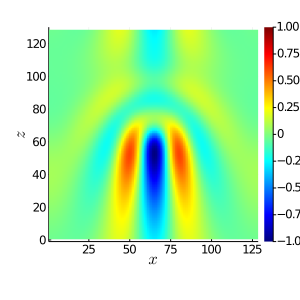

In [1995]:
u = permutedims(reshape(Fi*X[:,27],Nx,Ny,Nz,3),(3,2,1,4))

nx, nz = [16,16]
û = spectral_chop(fft(u,(1,3)),nx,nz)
u2 = real.(ifft(spectral_pad(û,128,128),(1,3)))

display(heatmap(abs.(û)[:,33,:,2]/maximum(abs.(û[:,33,:,2])),c=:jet,xlabel=L"x",ylabel=L"z",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

display(heatmap(u2[:,33,:,2]/maximum(abs.(u2[:,33,:,2])),c=:jet,xlabel=L"x",ylabel=L"z",
    clim=(-lim,lim), size=(300,300),aspectratio=1))

## Generate initial conditions

Random disturbances

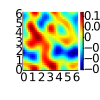

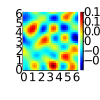

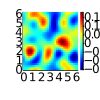

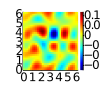

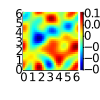

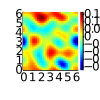

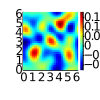

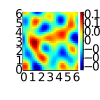

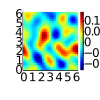

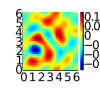

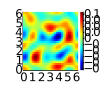

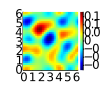

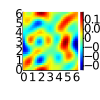

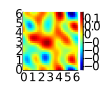

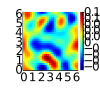

In [910]:
using Random,ApproxFun
nf = 65
f = [Fun(Chebyshev(),Array(I(nf)[i,:])) for i=1:nf]
fy = [f[i].(y) for i=1:nf]
T = [fy[1]].-fy[3:2:nf]
nk = length(T)
α = collect(-3:3)
β = collect(-3:3)
nα = length(α)
nβ = length(β)
for nseed=1:15
    dir = datadir("sims","channel_flow","run_random_$(nseed)")
    mkdir(dir)
    Random.seed!(nseed)
    A = 2*rand(nα,nβ,nk).-1 
    up = zeros(Nx,Ny,Nz,3)
    for i=1:nα, j=1:nβ, k=1:nk
        if α[i]≠0 || β[j]≠0
            qp = [T[k][2:Ny-1]; zeros(Ny-2)].*(1+im)     
            up += A[i,j,k]*real.(q̂2u(qp,α[i],β[j],Nx,Nz))
        end
    end
    up = E0*up/energy(up)
    uB = base_flow(Nx,Ny,Nz)
    attr = Dict("nu" => 0.0,"b" => 1.0,"a" => -1.0,
            "Lx" => 6.283185307179586,"Lz" => 6.283185307179586,
            "Nz" => Nz,"Nx" => Nx,"Ny" => Ny,"Nd" => 3,
            "Nypad" => Ny,"Nxpad" => Nx,"Nzpad" => Nz)
    save_field(dir*"/uB.h5",uB,attr)
    save_field(dir*"/u0.h5",up,attr)
    display(heatmap(x,z,up[:,div(Ny+1,2),:,2]'/E0,c=:jet,size=(100,100)))
end

Optimal forcing

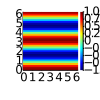

In [888]:
dir = datadir("sims","channel_flow","run_optimal2_w=0.0")
# mkdir(dir)

load_dir = datadir("sims","channel_flow","resolvent_truth_w=0.0_mode1.mat")
up,~ = load_mode(load_dir)
# upm = mean(up,dims=(2))
# up = up .- upm
up = (1e-5)*up/energy(up)
attr = Dict("nu" => 0.0,"b" => 1.0,"a" => -1.0,
        "Lx" => 6.283185307179586,"Lz" => 6.283185307179586,
        "Nz" => Nz,"Nx" => Nx,"Ny" => Ny,"Nd" => 3,
        "Nypad" => Ny,"Nxpad" => Nx,"Nzpad" => Nz)
save_field(dir*"/uB.h5",uB,attr)
save_field(dir*"/u0.h5",0.0*uB+up,attr)
heatmap(z,x,up[:,div(Ny+1,2),:,2]/maximum(up),c=:jet,size=(100,100))

Localized impulse

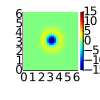

In [2]:
dir = datadir("sims","channel_flow","run_localized")
# mkdir(dir)

up = zeros(Nx,Ny,Nz,3)
α2 = 0.7^2
αy2 = 0.6^2
for i=1:Nx, j=1:Ny, k=1:Nz
    r2a = (x[i]-1*π)^2 + (z[k]-1.0*π)^2
    up[k,j,i,2] = -(1-r2a/α2)*exp(-r2a/α2 -(y[j])^2/αy2)*(cos(π*y[j])+1)
end
up = E0*up/energy(up)
attr = Dict("nu" => 0.0,"b" => 1.0,"a" => -1.0,
        "Lx" => 6.283185307179586,"Lz" => 6.283185307179586,
        "Nz" => Nz,"Nx" => Nx,"Ny" => Ny,"Nd" => 3,
        "Nypad" => Ny,"Nxpad" => Nx,"Nzpad" => Nz)
save_field(dir*"/uB.h5",uB,attr)
save_field(dir*"/u0.h5",up,attr)
heatmap(z,x,up[:,div(Ny+1,2),:,2]/E0,c=:jet,size=(100,100),clim=(-15,15))